In [70]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import seaborn as sns

## EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean 13.20 dolar and standard deviation 2.50 dolar. A company in this industry employs 40 workers, paying them an average of 12.20 dolar per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test.

### *Ho: Wages are standart, Ha: Wages are substandart*

In [71]:
mu = 13.20
sd = 2.50
n = 40
x_bar = 12.20
alpha = 0.01

In [72]:
wage_statistic = (x_bar - mu) / (sd/(math.sqrt(n)))
wage_statistic

-2.5298221281347035

In [73]:
p_value1 = stats.t.cdf(wage_statistic, df=n-1)

print(f'P Value = {p_value1}')
if p_value1 < alpha:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null Hypothesis')

P Value = 0.0077816812266594355
Reject the Null Hypothesis


## EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

### *Ho: soil1_mean = soil2_mean*
### *Ha: soil1_mean != soil2_mean*

In [74]:
s = pd.read_csv("soil.csv")
s.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [75]:
print(f"Mean = {s.Soil1.mean()}, Std.Dev. = {s.Soil1.std()}, Size = {s.Soil1.count()}")

Mean = 1.6918, Std.Dev. = 0.20690284243310084, Size = 30


In [76]:
print(f"Mean = {s.Soil2.mean()}, Std.Dev. = {s.Soil2.std()}, Size = {s.Soil2.count()}")

Mean = 1.4171142857142858, Std.Dev. = 0.2191842860711146, Size = 35


In [77]:
soil1_mean = 1.6918
soil1_sd = 0.2069028424
soil1_n = 30

soil2_mean = 1.417114286
soil2_sd = 0.2191842861
soil2_n = 35

alpha = 0.01

In [78]:
soil = stats.ttest_ind_from_stats(soil1_mean, soil1_sd, soil1_n, soil2_mean, soil2_sd, soil2_n)
soil

Ttest_indResult(statistic=5.168147326528748, pvalue=2.5932287849653065e-06)

In [79]:
soil.pvalue

2.5932287849653065e-06

In [80]:
soil1 = s["Soil1"].dropna()
soil2 = s["Soil2"]

In [81]:
stats.levene(soil1,soil2)

LeveneResult(statistic=0.3148629298209055, pvalue=0.5767018253541134)

In [82]:
print(f'P Value = {soil.pvalue}')
if soil.pvalue < alpha:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null Hypothesis')

P Value = 2.5932287849653065e-06
Reject the Null Hypothesis


## EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

## Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC). Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [83]:
wb = pd.read_csv("2015 PISA Test.csv")
wb

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [84]:
wb.Continent_Code.value_counts(dropna=False)

EU     37
AS     17
SA      7
NaN     5
OC      2
AF      2
Name: Continent_Code, dtype: int64

In [85]:
wb.Continent_Code.fillna("NA", inplace=True)

In [86]:
wb.Continent_Code.value_counts(dropna=False)

EU    37
AS    17
SA     7
NA     5
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [87]:
wb.groupby("Continent_Code").describe()

internet_users_per_100                                   \
                                count       mean        std        min   
Continent_Code                                                           
AF                                2.0  43.359918   7.297226  38.200000   
AS                               17.0  68.455613  21.086060  21.976068   
EU                               37.0  77.274888  12.425773  53.744979   
NA                                5.0  66.886792  14.364359  54.215766   
OC                                2.0  86.391704   2.589686  84.560519   
SA                                7.0  60.180494   9.772455  40.900000   

                                                            Math              \
                      25%        50%        75%        max count        mean   
Continent_Code                                                                 
AF              40.779959  43.359918  45.939877  48.519836   2.0  363.212100   
AS              50.300000  74.000000  84.948353  92.884826  17.0  466.216647   
EU              68.632900  76.184000  87.479056  98.200000  37.0  477.981449   
NA              57.431043  59.762950  74.554202  88.470000   5.0  424.250960   
OC              85.476112  86.391704  87.307296  88.222889   2.0  494.559750   
SA              57.116462  64.289000  66.321532  69.198471   7.0  402.887700   

                ...     Reading           Science                         \
                ...         75%       max   count        mean        std   
Continent_Code  ...                                                        
AF              ...  358.256450  361.0555     2.0  381.074250   7.536556   
AS              ...  508.690500  535.1002    17.0  467.945847  56.671371   
EU              ...  499.814600  526.4247    37.0  478.299381  34.450616   
NA              ...  496.935100  526.6678     5.0  438.180760  76.789918   
OC              ...  507.678175  509.2707     2.0  511.648700   2.340241   
SA              ...  431.922700  458.5709     7.0  421.747186  18.470319   

                                                                       
                     min         25%        50%         75%       max  
Continent_Code                                                         
AF              375.7451  378.409675  381.07425  383.738825  386.4034  
AS              386.4854  417.611200  456.48360  523.277400  555.5747  
EU              383.6824  460.774900  490.22500  501.936900  534.1937  
NA              331.6388  415.709900  419.60800  496.242400  527.7047  
OC              509.9939  510.821300  511.64870  512.476100  513.3035  
SA              396.6836  408.205450  424.59050  433.794600  446.9561  

[6 rows x 32 columns]

In [88]:
wb.groupby("Continent_Code").aggregate([np.mean, np.median, np.std, np.var])

internet_users_per_100                                    \
                                 mean     median        std         var   
Continent_Code                                                            
AF                          43.359918  43.359918   7.297226   53.249507   
AS                          68.455613  74.000000  21.086060  444.621918   
EU                          77.274888  76.184000  12.425773  154.399841   
NA                          66.886792  59.762950  14.364359  206.334814   
OC                          86.391704  86.391704   2.589686    6.706475   
SA                          60.180494  64.289000   9.772455   95.500869   

                      Math                                        Reading  \
                      mean     median        std          var        mean   
Continent_Code                                                              
AF              363.212100  363.21210   5.099513    26.005030  355.457400   
AS              466.216647  459.81600  64.356490  4141.757822  454.059682   
EU              477.981449  489.72870  35.150403  1235.550805  476.164608   
NA              424.250960  408.02350  71.717058  5143.336351  446.420920   
OC              494.559750  494.55975   0.938401     0.880597  506.085650   
SA              402.887700  409.03330  18.128894   328.656783  425.359229   

                                                      Science             \
                   median        std          var        mean     median   
Continent_Code                                                             
AF              355.45740   7.916909    62.677447  381.074250  381.07425   
AS              433.54230  57.048962  3254.584049  467.945847  456.48360   
EU              487.25010  37.720545  1422.839540  478.299381  490.22500   
NA              427.48750  66.614744  4437.524053  438.180760  419.60800   
OC              506.08565   4.504341    20.289087  511.648700  511.64870   
SA              425.30310  19.709688   388.471816  421.747186  424.59050   

                                        
                      std          var  
Continent_Code                          
AF               7.536556    56.799679  
AS              56.671371  3211.644321  
EU              34.450616  1186.844969  
NA              76.789918  5896.691519  
OC               2.340241     5.476726  
SA              18.470319   341.152678

In [89]:
eu_math_mean = wb[wb.Continent_Code=="EU"]["Math"].mean()
eu_math_mean

477.98144864864867

In [90]:
as_math_mean = wb[wb.Continent_Code=="AS"]["Math"].mean()
as_math_mean

466.2166470588236

In [91]:
eu_math = wb[wb.Continent_Code=="EU"]["Math"]

In [92]:
as_math = wb[wb.Continent_Code=="AS"]["Math"]

In [93]:
wb["AS_MATH"] = wb[wb.Continent_Code=="AS"]["Math"]

In [94]:
wb["EU_MATH"] = wb[wb.Continent_Code=="EU"]["Math"]

In [95]:
wb

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science,AS_MATH,EU_MATH
0,ALB,EU,63.252933,413.1570,405.2588,427.2250,NaN,413.1570
1,ARE,AS,90.500000,427.4827,433.5423,436.7311,427.4827,NaN
2,ARG,SA,68.043064,409.0333,425.3031,432.2262,NaN,NaN
3,AUS,OC,84.560519,493.8962,502.9006,509.9939,NaN,NaN
4,AUT,EU,83.940142,496.7423,484.8656,495.0375,NaN,496.7423
...,...,...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034,NaN,NaN
66,TUR,EU,53.744979,420.4540,428.3351,425.4895,NaN,420.4540
67,URY,SA,64.600000,417.9919,436.5721,435.3630,NaN,NaN
68,USA,NA,74.554202,469.6285,496.9351,496.2424,NaN,NaN


In [96]:
wb.describe()[['EU_MATH', 'AS_MATH']]

,EU_MATH,AS_MATH
count,37.000000,17.000000
mean,477.981449,466.216647
std,35.150403,64.356490
min,371.311400,380.259000
25%,464.040100,403.833200
50%,489.728700,459.816000
75%,503.722000,531.296100
max,521.250600,564.189700


In [97]:
stat1, p1 = stats.shapiro(eu_math)

In [98]:
print('Statistics=%.3f, p=%.3f' % (stat1, p1))

alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.873, p=0.001
Sample does not look Gaussian (reject H0)


In [99]:
stat2, p2 = stats.shapiro(as_math)

In [100]:
print('Statistics=%.3f, p=%.3f' % (stat2, p2))

alpha = 0.05
if p2 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.905, p=0.081
Sample looks Gaussian (fail to reject H0)


In [101]:
stats.levene(eu_math, as_math)

LeveneResult(statistic=14.300030628780673, pvalue=0.0004037413184451079)

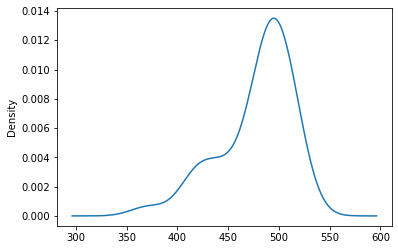

In [102]:
wb.EU_MATH.plot.density();

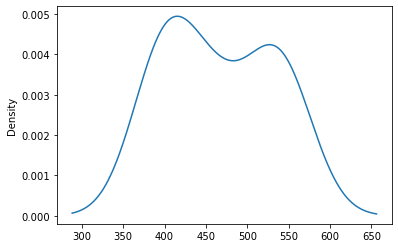

In [103]:
wb.AS_MATH.plot.density();

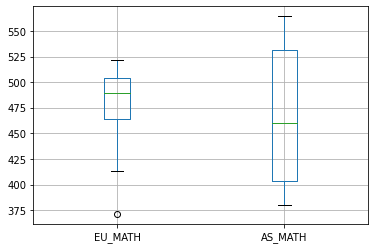

In [104]:
wb.boxplot(column=['EU_MATH', 'AS_MATH']);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

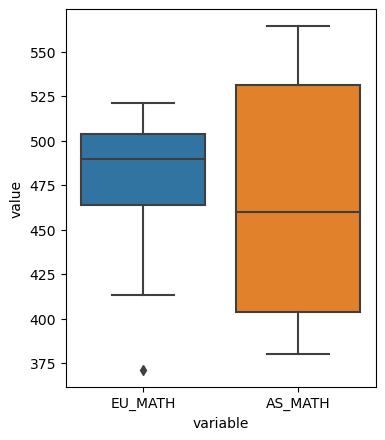

In [105]:
df = pd.DataFrame(data=wb, columns=['EU_MATH', 'AS_MATH'])

plt.figure(figsize=(4,5), dpi=100)
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()